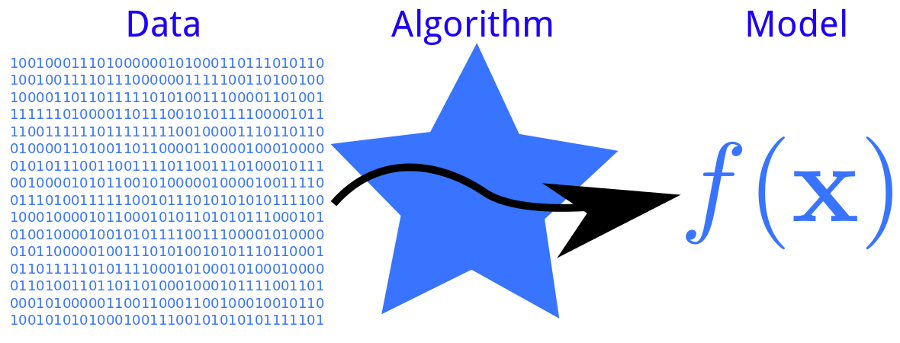

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Label Encoding
- Data Splitting for Modeling
- Data Modeling
    - Regression
    - Classification

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
apps_data = pd.read_csv(r'file4_googleplaystore.csv')

In [3]:
# Print top 5 rows in the dataframe.
apps_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.000000,19.000000,10000.000000,Free,0.000000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018.000000
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.000000,14.000000,500000.000000,Free,0.000000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700000,87510.000000,8.700000,5000000.000000,Free,0.000000,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018.000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,136881.750000,25.000000,12498500.000000,Free,0.000000,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018.000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.000000,2.800000,100000.000000,Free,0.000000,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018.000000


In [4]:
# Print bottom 5 rows in the dataframe.
apps_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10835,Sya9a Maroc - FR,FAMILY,4.500000,38.000000,53.000000,5000.000000,Free,0.000000,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017.000000
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.000000,3.600000,100.000000,Free,0.000000,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018.000000
10837,Parkinson Exercices FR,MEDICAL,4.300000,3.000000,9.500000,1000.000000,Free,0.000000,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017.000000
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.000000,65.150000,1000.000000,Free,0.000000,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015.500000
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,136881.750000,19.000000,10000000.000000,Free,0.000000,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,25,7,2018.000000


In [5]:
# Print the shape of the DataFrame
print("The shape of data frame:", apps_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(apps_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(apps_data.columns))

The shape of data frame: (10840, 16)
Number of Rows in the dataframe: 10840
Number of Columns in the dataframe: 16


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LABEL ENCODING</h2>
</div>

In [6]:
apps_data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [7]:
apps_data = pd.get_dummies(apps_data,columns=['Type','Content Rating'],drop_first=True)

In [8]:
# Print top 5 rows in the dataframe.
apps_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.000000,19.000000,10000.000000,0.000000,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018.000000,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.000000,14.000000,500000.000000,0.000000,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018.000000,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700000,87510.000000,8.700000,5000000.000000,0.000000,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018.000000,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,136881.750000,25.000000,12498500.000000,0.000000,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018.000000,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.000000,2.800000,100000.000000,0.000000,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018.000000,0,1,0,0,0,0


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA SPLITTING FOR MODELING</h2>
</div>

In [9]:
X = apps_data.drop(columns=['App','Category','Rating', 'Genres', "Last Updated","Current Ver","Android Ver","Day","Month","Year"],axis=1)

In [10]:
X.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,Reviews,Size,Installs,Price,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159.000000,19.000000,10000.000000,0.000000,0,1,0,0,0,0
1,967.000000,14.000000,500000.000000,0.000000,0,1,0,0,0,0
2,87510.000000,8.700000,5000000.000000,0.000000,0,1,0,0,0,0
3,136881.750000,25.000000,12498500.000000,0.000000,0,0,0,0,1,0
4,967.000000,2.800000,100000.000000,0.000000,0,1,0,0,0,0


In [11]:
y = apps_data['Rating']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">DATA MODELING</h2>
</div>

<br>
<span style="color: white; background-color: #0074e4; font-weight: bold; padding: 5px; font-size: 30px;"> REGRESSION </span>
</br>

In [13]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [14]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

## 1] Linear Regressor

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

## 2] KNeighbors Regressor

In [18]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [19]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [20]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

## 3] Random Forest Regressor

In [21]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [22]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [23]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 16px;"> REGRESSION EVALUATION </span>
</br>

In [24]:
# Rounding the values
df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.406
                      MAE     0.314
                      R2      0.055
              test    RMSE    0.403
                      MAE     0.310
                      R2      0.062
KNN           train   RMSE    0.343
                      MAE     0.262
                      R2      0.328
              test    RMSE    0.422
                      MAE     0.321
                      R2     -0.026
Random Forest train   RMSE    0.405
                      MAE     0.314
                      R2      0.063
              test    RMSE    0.402
                      MAE     0.310
                      R2      0.068

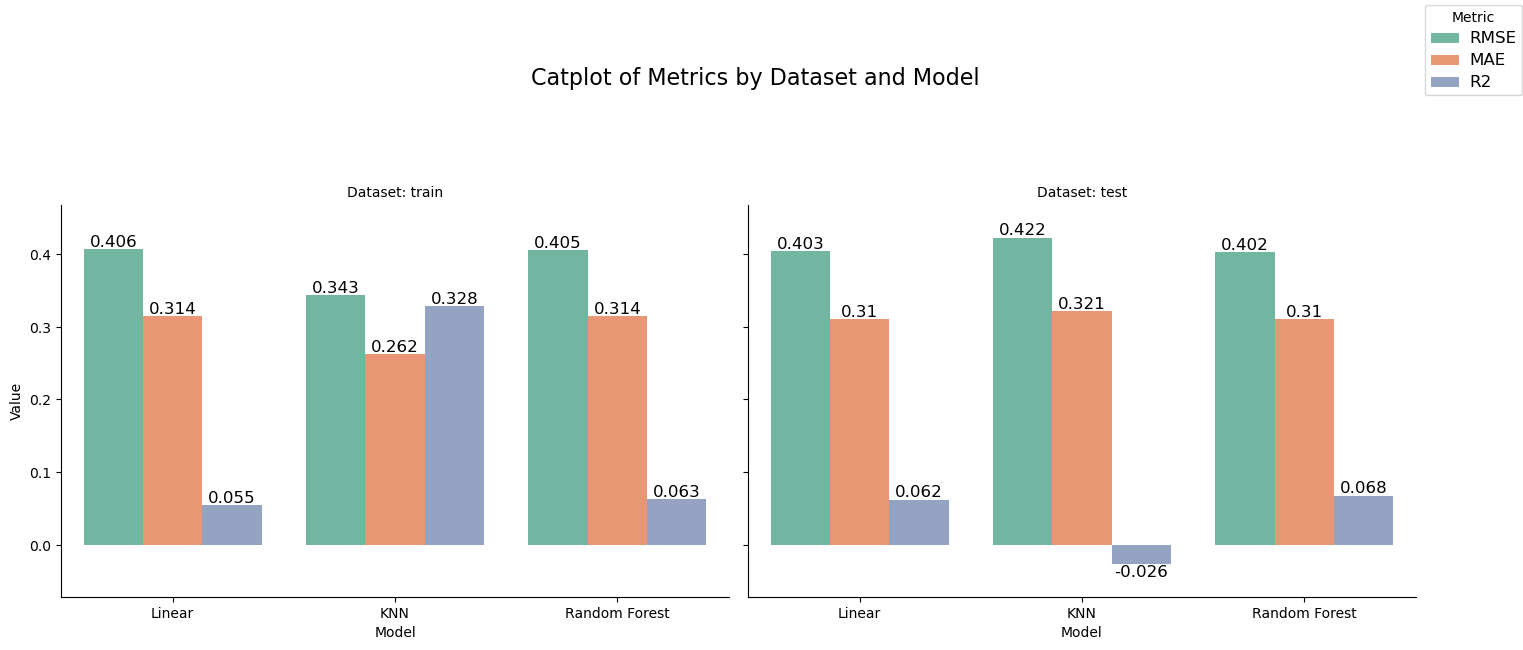

In [25]:
# Reset the index
data = df_metrics_reg.reset_index()

# Set a beautiful color palette
custom_palette = sns.color_palette("Set2")

# Create the catplot with custom styling
g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric',
                palette=custom_palette, height=6, aspect=1.2)

# Adding annotations to bars
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fontsize=12, color='black')

    ax.margins(y=0.1)

# Set titles and labels
g.set_axis_labels('Model', 'Value')
g.set_titles(col_template='Dataset: {col_name}')

# Customize the legend
legend = g._legend
legend.set_title('Metric')
legend.set_bbox_to_anchor((1, 1))  # Adjust the legend's position
legend.set_frame_on(True)
for text in legend.get_texts():
    text.set_fontsize(12)
    
# Set a title for the entire plot
plt.subplots_adjust(top=0.75)
plt.suptitle('Catplot of Metrics by Dataset and Model', fontsize=16)

# Show the plot
plt.show()

<br>
<span style="color: white; background-color: #0074e4; font-weight: bold; padding: 5px; font-size: 30px;"> CLASSIFICATION </span>
</br>

### Insights:

- The Regression predictions don't hold up very well!

- We can interpret that the dataset is not suitable for regression problem.

In [26]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [27]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [28]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

## 1] Logistic Regression Classifier

In [29]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [30]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

## 2] KNeighbors Classifier

In [31]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [32]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

## 3] Random Forest Classifier

In [33]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [34]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

<br>
<span style="color: yellow; background-color: black; font-weight: bold; padding: 5px; font-size: 16px;"> CLASSIFICATION EVALUATION </span>
</br>

In [35]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         71.52
                    test          71.99
KNN                 train         80.28
                    test          72.39
Random Forest       train         98.55
                    test          72.94

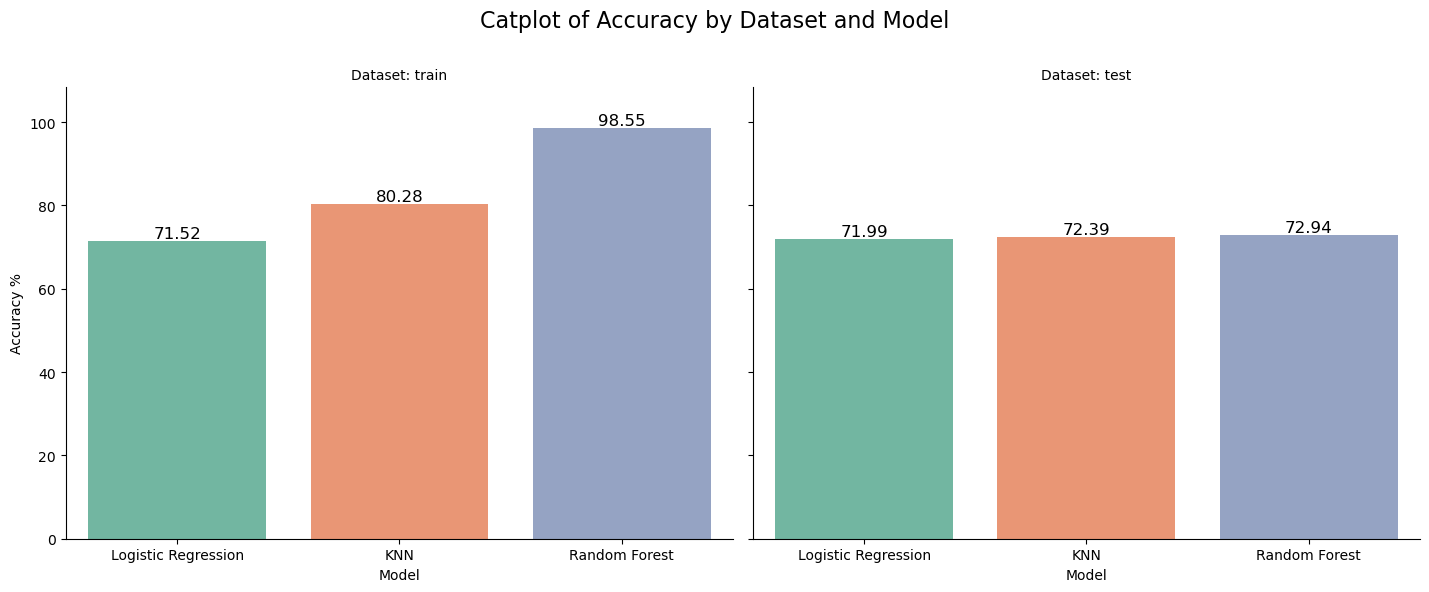

In [36]:
# Reset the index
data = df_metrics_clf.reset_index()

# Set a beautiful color palette
custom_palette = sns.color_palette("Set2")

# Create the catplot with custom styling
g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %',
                palette=custom_palette, height=6, aspect=1.2)

# Adding annotations to bars
for ax in g.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge', fontsize=12, color='black')

    ax.margins(y=0.1)

# Set titles and labels
g.set_axis_labels('Model', 'Accuracy %')
g.set_titles(col_template='Dataset: {col_name}')

# Lift the title upwards
plt.subplots_adjust(top=0.85)  # Increase the 'top' value to lift the title

# Set a title for the entire plot
plt.suptitle('Catplot of Accuracy by Dataset and Model', fontsize=16)

# Show the plot
plt.show()